In [1]:
import random
import numpy as np

In [2]:
def get_valid_trans(state):
  trans=[]
  if state==[0]*15:
    trans.append([0]*14+[1])
    #trans.append([1]+[0]*14)
  else:
    for i in range(15):
      if state[i]==0:
        a=state[:i]+[1]+state[i+1:]
        trans.append(a)
        break
    #for i in range(14,0,-1):
    #  if state[i]==0:
    #    a=state[:i]+[1]+state[i+1:]
    #    trans.append(a)
    #    break
  return trans
print(get_valid_trans([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [3]:
def montecarlo(n_simu,max_steps):
  routes=[]
  good_routes=0
  for i in range(n_simu):
    state=[0]*15
    route=[state.copy()]
    step=0
    while step<max_steps  and state!=[1]*15:
      transi=get_valid_trans(state)
      if not transi:
        break
      new_state=random.choice(transi)
      sw1=cal_sw(new_state)
      sw2=cal_sw(state)
      w=sw1/sw2
      if w>1:
        state=new_state
        route.append(state)
      else:
        if random.random()<w:
          state=new_state
          route.append(state)
      step+=1
    if state==[1]*15:
      if route not in routes:
        routes.append(route)
        good_routes+=1
  #print(routes)
  print(good_routes)
  return routes, good_routes

def get_valid_trans(state):
  trans=[]
  if state==[0]*15:
    state[random.randint(0, 14)] = 1
    return [state]
  else:
    for i in range(15):
      if i==0 and state[i]==1:
        break
      elif state[i]==1:
        a=state[:i-1]+[1]+state[i:]
        trans.append(a)
        break
    for i in range(14,0,-1):
      if state[i]==1:
        a=state[:i+1]+[1]+state[i+2:]
        trans.append(a)
        break
  return trans


def cal_sw(state):
  sigma=10**-3
  s=2
  w=1
  for i in range(15):
    if i==0 and state[i]!=0:
        w*=sigma*s
    elif i > 0 and state[i]==1 and state[i-1]==0:
        w*=sigma*s
    elif state[i]==1 and state[i-1]==1 :
        w*=s
  return w

In [4]:
routes, a = montecarlo(1000000, 100)

16241


In [4]:
print(a)

16246


8648
11889
13622
14664
15211
15641
15907
16060
16179
16233


<ipython-input-3-832f91e56f20>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


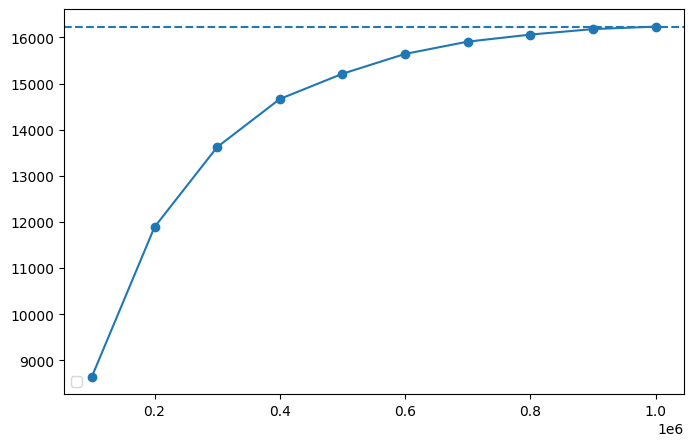

[8648, 11889, 13622, 14664, 15211, 15641, 15907, 16060, 16179, 16233]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def simu_multiple_runs(max_simu, st):
    simu_values = list(range(100000, max_simu + 1, st))
    sr = []
    for i in simu_values:
        good_routes = montecarlo(i, max_steps=100)
        succ = good_routes
        sr.append(succ)
    plt.figure(figsize=(8, 5))
    plt.plot(simu_values, sr, marker='o', linestyle='-')
    plt.axhline(y=sr[-1], linestyle='--')
    plt.legend()
    plt.show()
    return sr
a=simu_multiple_runs(1000000, 100000)
print(a)
